<a href="https://colab.research.google.com/github/borgesjose/Data-Science/blob/master/Aula_01_Quarentena_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analise da base de dados de filmes do Movie Lens.




## Introdução a analise de dados

### 1. Importando os Dados:

In [0]:
import pandas as pd #Importando a biblioteca a ser utilizada

In [51]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [52]:
avaliacoes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv")
avaliacoes.columns = ["usuarioId","filmeId","nota","momento"]
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


### 2. Analisando os Dados

In [53]:
avaliacoes_do_filme_1 = avaliacoes.query("filmeId==1")
avaliacoes_do_filme_1.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


In [54]:
avaliacoes_do_filme_1.describe()

,usuarioId,filmeId,nota,momento
count,215.000000,215.0,215.000000,2.150000e+02
mean,306.530233,1.0,3.920930,1.129835e+09
std,180.419754,0.0,0.834859,2.393163e+08
min,1.000000,1.0,0.500000,8.293223e+08
25%,155.500000,1.0,3.500000,8.779224e+08
50%,290.000000,1.0,4.000000,1.106855e+09
75%,468.500000,1.0,4.500000,1.348523e+09
max,610.000000,1.0,5.000000,1.535710e+09


In [55]:
avaliacoes["nota"]

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [56]:
avaliacoes["nota"].mean()

3.501556983616962

In [57]:
avaliacoes_do_filme_1["nota"].mean()

3.9209302325581397

In [58]:
notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()
notas_medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [59]:
notas_medias_por_filme

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

In [60]:
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")
filmes_com_media.head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [61]:
filmes_com_media.sort_values("nota", ascending=False).head(15)

,filmeId,titulo,generos,nota
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
4251,6201,Lady Jane (1986),Drama|Romance,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0
9122,145994,Formula of Love (1984),Comedy,5.0


Plotando os dados:

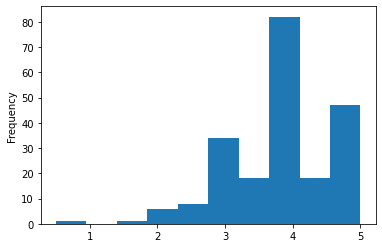

In [62]:
avaliacoes.query("filmeId == 1")["nota"].plot(kind='hist')

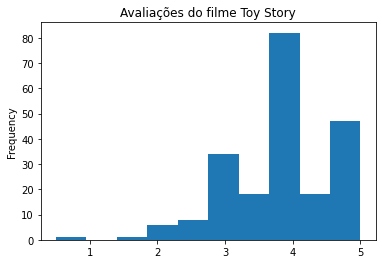

In [63]:
avaliacoes.query("filmeId == 1")["nota"].plot(kind='hist',title="Avaliações do filme Toy Story")

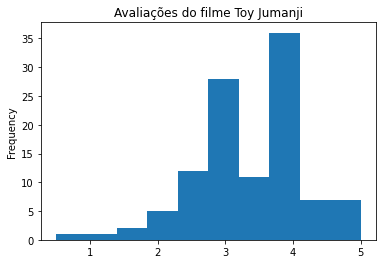

In [64]:
avaliacoes.query("filmeId == 2")["nota"].plot(kind='hist',title="Avaliações do filme Toy Jumanji")

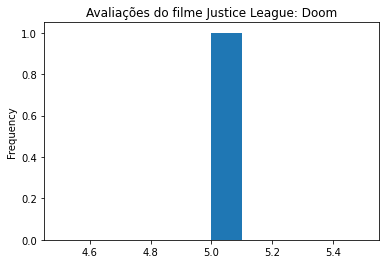

In [65]:
avaliacoes.query("filmeId == 102084")["nota"].plot(kind='hist',title="Avaliações do filme Justice League: Doom")

### 3. Desafios:


#### 3.1 Determine quantos filmes não tem avaliações e quais são esses filmes.

O numero de filmes é:

In [66]:
filmes_com_media.isnull().sum().sum()

18

Os filmes são:

In [67]:
filmes_sem_nota = filmes_com_media[filmes_com_media["nota"].isnull()]["titulo"]
filmes_sem_nota

816                            Innocents, The (1961)
2211                                  Niagara (1953)
2499                          For All Mankind (1989)
2587    Color of Paradise, The (Rang-e khoda) (1999)
3118                  I Know Where I'm Going! (1945)
4037                              Chosen, The (1981)
4506     Road Home, The (Wo de fu qin mu qin) (1999)
4598                                  Scrooge (1970)
4704                                    Proof (1991)
5020                       Parallax View, The (1974)
5293                        This Gun for Hire (1942)
5421                    Roaring Twenties, The (1939)
5452                     Mutiny on the Bounty (1962)
5749              In the Realms of the Unreal (2004)
5824                        Twentieth Century (1934)
5837                       Call Northside 777 (1948)
5957                    Browning Version, The (1951)
7565                              Chalet Girl (2011)
Name: titulo, dtype: object

#### 3.2 Mudar o nome da coluna nota do dataframe filmes_com_media para nota_média após o join.

In [68]:
filmes_com_media.rename(columns={'nota': 'nota_media'}, inplace=True)
filmes_com_media.head()

,filmeId,titulo,generos,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


#### 3.3 Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

In [0]:
numero_de_votos_por_filme = avaliacoes.groupby("filmeId")["nota"].count()

In [70]:
filmes_com_media_e_numero_de_votos = filmes_com_media.join(numero_de_votos_por_filme, on="filmeId")
filmes_com_media_e_numero_de_votos.rename(columns={'nota':'numero_de_votos'}, inplace=True)
filmes_com_media_e_numero_de_votos.head()

,filmeId,titulo,generos,nota_media,numero_de_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


#### 3.4 Arredondar as médias (coluna de nota média) para duas casas decimais.

In [71]:
filmes_com_media_e_numero_de_votos.nota_media = filmes_com_media_e_numero_de_votos.nota_media.round(2)
filmes_com_media_e_numero_de_votos.head()

,filmeId,titulo,generos,nota_media,numero_de_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0


#### 3.5 Descobrir os generos dos filmes (quais são eles, únicos). (esse aqui o bicho pega)

In [72]:
filmes_com_media_e_numero_de_votos["generos"]

0       Adventure|Animation|Children|Comedy|Fantasy
1                        Adventure|Children|Fantasy
2                                    Comedy|Romance
3                              Comedy|Drama|Romance
4                                            Comedy
                           ...                     
9737                Action|Animation|Comedy|Fantasy
9738                       Animation|Comedy|Fantasy
9739                                          Drama
9740                               Action|Animation
9741                                         Comedy
Name: generos, Length: 9742, dtype: object

In [0]:
todos_os_generos = []
for x in filmes_com_media_e_numero_de_votos["generos"].str.split(pat = "|"):
    todos_os_generos.extend(x)
generos = set(todos_os_generos)

Logo os generos utilizados para avaliação são:

In [74]:
generos

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

#### 3.6 Contar o número de aparições de cada genero.

In [0]:
serie_generos = pd.Series(todos_os_generos)

In [0]:
list = []
for x in generos:
  cont = 0;
  for y in serie_generos:
    if y == x:
      cont+=1
  list.append((x,cont))
numero_de_aparicoes_genero = pd.Series(dict(list))

Então temos:

In [77]:
numero_de_aparicoes_genero.sort_values(ascending=False)

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

#### 3.7 Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

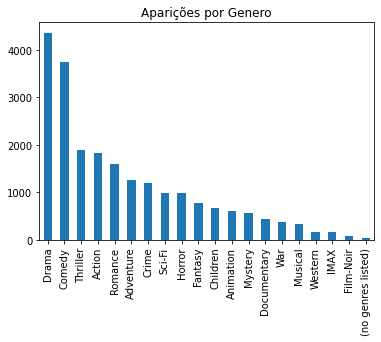

In [78]:
numero_de_aparicoes_genero.sort_values(ascending=False).plot(kind='bar',title="Aparições por Genero")